In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파일 불러오기
case=pd.read_csv('./Case.csv',header=0)
patientinfo=pd.read_csv('./Patientinfo.csv',header=0)
patientroute=pd.read_csv('./PatientRoute.csv',header=0)
region=pd.read_csv('./Region.csv',header=0)
search_trend=pd.read_csv('./SearchTrend.csv',header=0)
seoul_floating=pd.read_csv('./SeoulFloating.csv',header=0)
time=pd.read_csv('./Time.csv',header=0)
time_age=pd.read_csv('./TimeAge.csv',header=0)
time_gender=pd.read_csv('./TimeGender.csv',header=0)
time_province=pd.read_csv('./TimeProvince.csv',header=0)
weather=pd.read_csv('./Weather.csv',header=0)

### 1. 코로나19로 인한 확진자/사망자 파악

#### TimeAge.csv
    - date: 날짜
    - age: 연령대 (0~80대)
    - confirmed: 확진자수
    - deceased: 사망자수

#### TimeGender.csv
    - date: 날짜
    - gender: 성별
    - confirmed: 확진자수
    - deceased: 사망자수  

#### 확진자수 변화 추이 확인하기 (연령)

In [3]:
time_age['date']=time_age['date'].str.slice(start=5,stop=10)

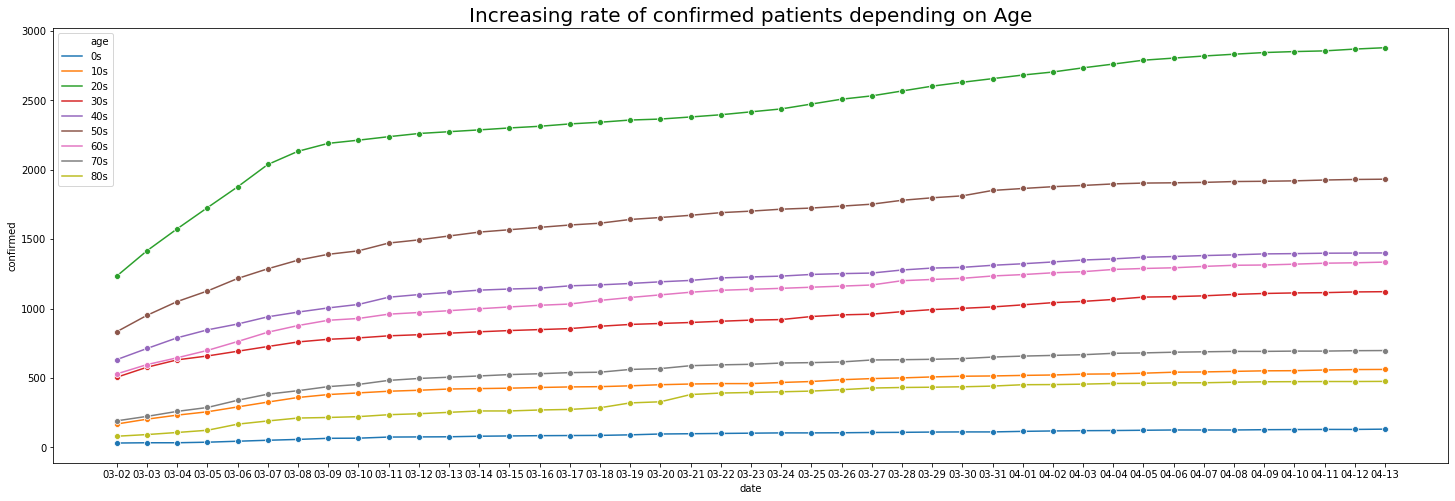

In [4]:
plt.figure(figsize=(25,8))
sns.lineplot(data=time_age,x='date',y='confirmed',hue='age',marker='o')
plt.title('Increasing rate of confirmed patients depending on Age',fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### 확진자수 변화 추이 확인하기 (성별)

In [5]:
time_gender['date']=time_gender['date'].str.slice(start=5,stop=10)

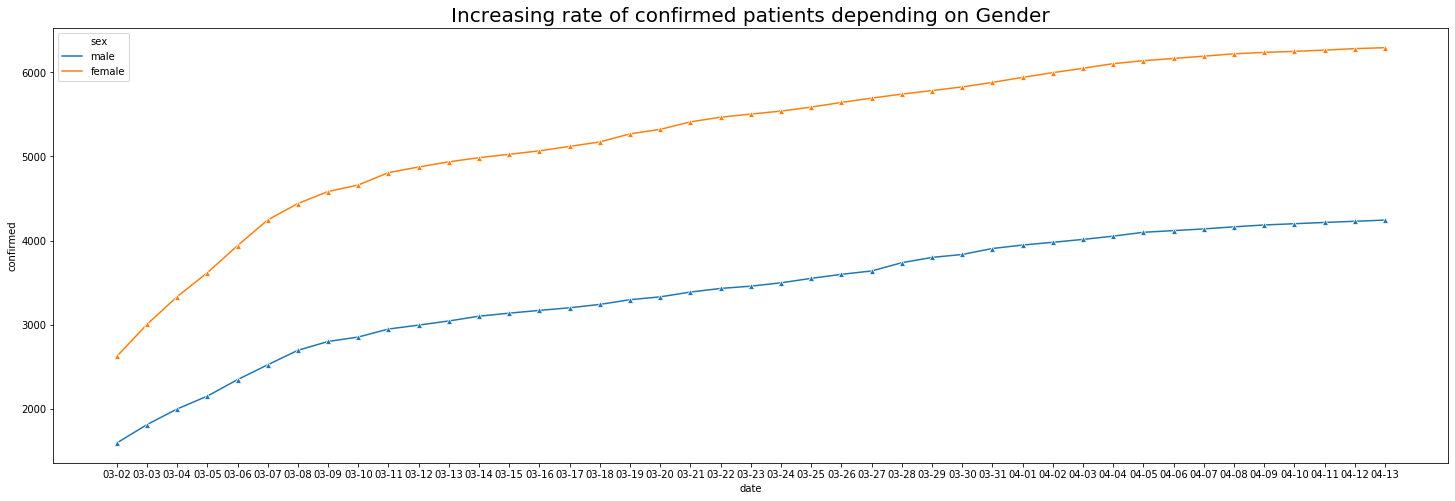

In [6]:
plt.figure(figsize=(25,8))
sns.lineplot(data=time_gender,x='date',y='confirmed',hue='sex',marker='^')
plt.title('Increasing rate of confirmed patients depending on Gender',fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### 누적 코로나19 확진자/사망자수 파악

In [15]:
# 누적 코로나19 사망자수 (성별, 연령대 기준)
deceased_age=time_age[time_age['date']=='04-13']
deceased_gender=time_gender[time_gender['date']=='04-13']

 + 사망자 비율 column 생성

In [17]:
deceased_gender['rate']=deceased_gender['deceased']/deceased_gender['confirmed']*100

In [18]:
deceased_age['rate']=deceased_age['deceased']/deceased_age['confirmed']*100

In [19]:
print(deceased_gender.head(1))
print('\n')
print(deceased_age.head(1))

     date  time   sex  confirmed  deceased      rate
84  04-13     0  male       4243       115  2.710346


      date  time age  confirmed  deceased  rate
378  04-13     0  0s        132         0   0.0


#### 성별에 따른 확진자수, 사망자 비율

In [20]:
deceased_gender.head()

,date,time,sex,confirmed,deceased,rate
84,04-13,0,male,4243,115,2.710346
85,04-13,0,female,6294,102,1.620591


 + 그래프 1: 성별별 확진자수, 그래프 2: 성별별 사망률

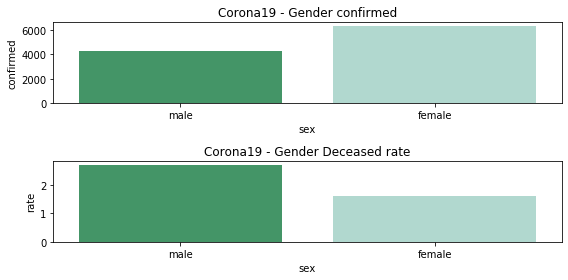

In [21]:
fig,axes=plt.subplots(2,1)
fig.set_size_inches((8,4)) 
sns.barplot(data=deceased_gender,x='sex',y='confirmed',palette='BuGn_r',ax=axes[0])
sns.barplot(data=deceased_gender,x='sex',y='rate',palette='BuGn_r',ax=axes[1])
axes[0].set_title('Corona19 - Gender confirmed')
axes[1].set_title('Corona19 - Gender Deceased rate')
plt.tight_layout()
plt.show()

#### 연령대에 따른 확진자수, 사망자 비율

In [22]:
deceased_age.head()

,date,time,age,confirmed,deceased,rate
378,04-13,0,0s,132,0,0.000000
379,04-13,0,10s,562,0,0.000000
380,04-13,0,20s,2879,0,0.000000
381,04-13,0,30s,1122,1,0.089127
382,04-13,0,40s,1401,3,0.214133


 + 그래프 1: 연령대별 확진자수, 그래프 2: 연령대별 사망률

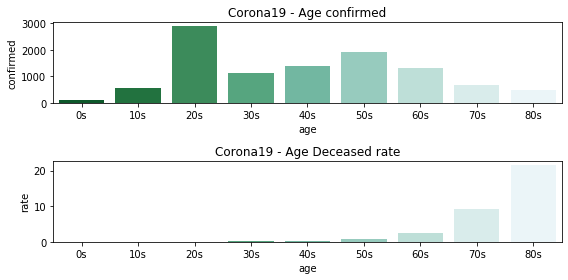

In [23]:
fig,axes=plt.subplots(2,1)
fig.set_size_inches((8,4)) 
sns.barplot(data=deceased_age,x='age',y='confirmed',palette='BuGn_r',ax=axes[0])
sns.barplot(data=deceased_age,x='age',y='rate',palette='BuGn_r',ax=axes[1])
axes[0].set_title('Corona19 - Age confirmed')
axes[1].set_title('Corona19 - Age Deceased rate')
plt.tight_layout()
plt.show()

### 2. 코로나19 사망/완치에 대한 고찰

 + Patientinfo.csv 이용

In [24]:
patientinfo.head(1)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released


#### Question 1) 증상을 빨리 발견할수록 사망률이 낮을까? 완치율은 높을까?

 + symptom_onset_date 에 있는 ' ' 제거가 필요하다

In [25]:
patientinfo['symptom_onset_date'].unique()

array(['2020-01-22', nan, '2020-01-26', '2020-02-06', '2020-02-11',
       '2020-02-21', '2020-02-19', '2020-02-24', '2020-02-25',
       '2020-02-23', '2020-02-26', '2020-02-20', '2020-02-27',
       '2020-02-18', '2020-03-01', '2020-03-02', '2020-03-06',
       '2020-03-04', '2020-02-28', '2020-03-05', '2020-03-07',
       '2020-02-29', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-15', '2020-03-13',
       '2020-03-16', '2020-03-19', '2020-03-17', '2020-03-18',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-20', '2020-03-29',
       '2020-03-28', '2020-03-27', '2020-04-01', '2020-04-05',
       '2020-04-07', '2020-02-22', '2020-02-16', '2020-02-15',
       '2020-01-27', ' ', '2020-03-31', '2020-01-19', '2020-01-31',
       '2020-03-14', '2020-03-03', '2020-02-01', '2020-02-04',
       '2020-03-30', '2020-04-04', '2020-04-02', '2020-04-09',
       '2020-04-03', '2020-04-06', '2020-04-1

In [26]:
patientinfo['confirmed_date'].unique()

array(['2020-01-23', '2020-01-30', '2020-01-31', '2020-02-02',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-16',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-26', '2020-02-24', '2020-02-25',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-03-03', '2020-02-18', '2020-

 + symptom_onset_date 에서 ' ' 제거

In [27]:
patientinfo=patientinfo[patientinfo['symptom_onset_date']!=' ']

In [28]:
patient_rm=patientinfo.dropna(subset=['symptom_onset_date','confirmed_date'])

In [29]:
patient_rm.shape

(461, 18)

 + 날짜형식으로 dtype 바꾸기

In [30]:
date_col=['symptom_onset_date','confirmed_date']

for col in date_col:
    patient_rm[col]=pd.to_datetime(patient_rm[col])

In [31]:
patient_rm.dtypes

patient_id                     int64
global_num                   float64
sex                           object
birth_year                   float64
age                           object
country                       object
province                      object
city                          object
disease                       object
infection_case                object
infection_order              float64
infected_by                  float64
contact_number               float64
symptom_onset_date    datetime64[ns]
confirmed_date        datetime64[ns]
released_date                 object
deceased_date                 object
state                         object
dtype: object

 + 증상시작일부터 확진까지 걸린 날짜 수 계산

In [32]:
patient_rm['time_to_confirmed']=pd.to_numeric((patient_rm['confirmed_date']-patient_rm['symptom_onset_date']).dt.days,downcast='integer')

In [33]:
patient_rm.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,time_to_confirmed
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,1
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,4
13,1000000014,30.0,female,1952.0,60s,Korea,Seoul,Jongno-gu,NaN,contact with patient,5.0,1.000000e+09,27.0,2020-02-06,2020-02-16,2020-03-12,NaN,released,10
14,1000000015,40.0,male,1943.0,70s,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,NaN,8.0,2020-02-11,2020-02-19,NaN,NaN,isolated,8
25,1000000026,420.0,male,1986.0,30s,Korea,Seoul,Seocho-gu,NaN,etc,NaN,NaN,NaN,2020-02-21,2020-02-22,2020-03-11,NaN,released,1


####  증상발견일과 사망/완치 사이의 관계

**주의** <br>
-deceased data 수가 매우 적음 <br>
-symptom onset date 의 기준이 모호함

In [34]:
# 애매한 isolated 제거
patient_rm=patient_rm[patient_rm['state']!='isolated']

 + 80대 boxplot 을 보면 사망자는 거의 감염사실을 늦게 알았다.

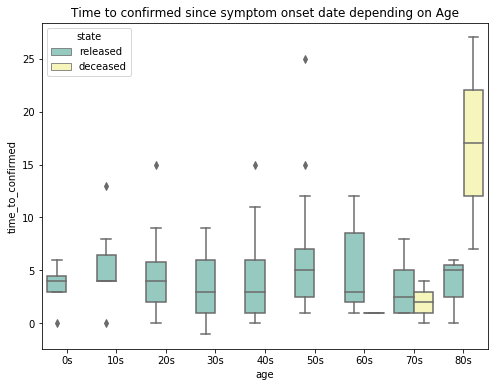

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(data=patient_rm,x='age',y='time_to_confirmed',hue='state',
            order=['0s','10s','20s','30s','40s','50s','60s','70s','80s'],palette='Set3')
plt.title('Time to confirmed since symptom onset date depending on Age')
plt.show()

#### Question 2: 전국 사망률이 가장 높은 80대, 70대의 감염원인은?

In [36]:
patient_80s=patientinfo[patientinfo['age']=='80s']
patient_70s=patientinfo[patientinfo['age']=='70s']

 + etc 가 가장 큰 원인(신천지라고 예상중), 확진자와의 접촉이 2위였다.

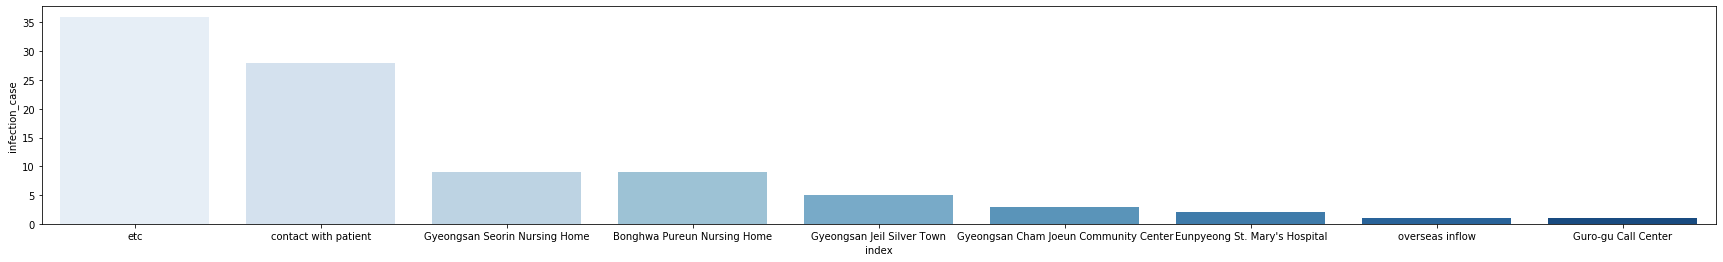

In [37]:
case_80=patient_80s['infection_case'].value_counts().to_frame().reset_index()
plt.figure(figsize=(30,4))
sns.barplot(data=case_80,x='index',y='infection_case',palette='Blues')

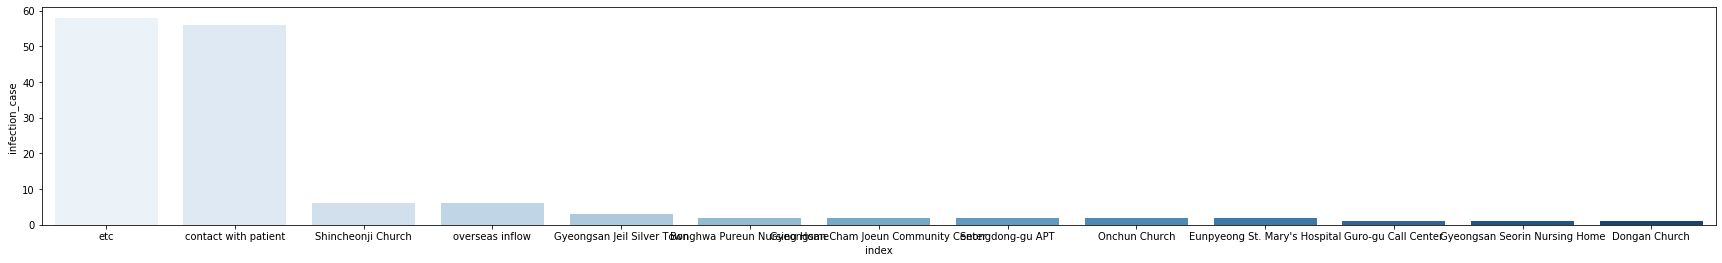

In [38]:
case_70=patient_70s['infection_case'].value_counts().to_frame().reset_index()
plt.figure(figsize=(30,4))
sns.barplot(data=case_70,x='index',y='infection_case',palette='Blues')

#### Question 3: 그러면 Region.csv 의 노령인구비율/독거노인인구비율과 상관관계가 있을까?

In [39]:
old_patients=patientinfo[(patientinfo['age']=='80s') | (patientinfo['age']=='70s') ]

In [41]:
old_patients_city=old_patients.groupby(['province'])['patient_id'].count().to_frame().reset_index()

In [43]:
old_patients_city

,province,patient_id
0,Busan,13
1,Chungcheongbuk-do,7
2,Chungcheongnam-do,4
3,Daegu,15
4,Daejeon,3
5,Gangwon-do,2
6,Gwangju,1
7,Gyeonggi-do,57
8,Gyeongsangbuk-do,201
9,Gyeongsangnam-do,7


 + Region.csv 에서 province=city 인 행만 남기기

In [44]:
region=region[region['province']==region['city']]

In [45]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
26,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
43,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
52,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
58,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497


In [46]:
region=region[['province','elderly_population_ratio','elderly_alone_ratio']]
r=region.set_index(['province'])

 + 노령인구비율 heatmap 그리기

Text(0.5, 1, 'Province-elderly population & elderly alone ratio')

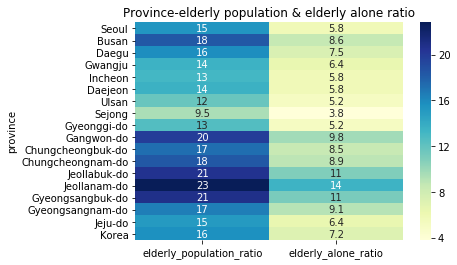

In [48]:
sns.heatmap(r,cmap='YlGnBu',annot=True)
plt.title('Province-elderly population & elderly alone ratio')

 +  노령인구와 노인확진자수의 관계는 별로 없어보인다.

In [50]:
df=pd.merge(old_patients_city,region,how='left')
df.corr()

,patient_id,elderly_population_ratio,elderly_alone_ratio
patient_id,1.000000,0.230738,0.19837
elderly_population_ratio,0.230738,1.000000,0.96511
elderly_alone_ratio,0.198370,0.965110,1.00000
